In [88]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, cos, floor, ceil, sqrt
import random
# mc2 = 511.0
# E_p = 0.002
mc2 = 511000.0
E_p = 2.0

# r_e = 1.0 # радиус электрона
r_e = 2.8179403262 * 10 ** -15

P_t = 1.
tau = 0

theta_LCS = 0

In [89]:
def collimate(max_theta):
    def _reject(func):
        def wrapper(*args, **kwargs):
            E_g = args[0]
            if np.arccos(mc2/E_p - mc2/E_g + 1) > max_theta:
                return 0
            return func(*args, **kwargs)
        return wrapper
    return _reject

# def lorentz_transform(gammaCM):
#     sz2 = np.cos(theta_LCS)
#     betaCM = sqrt(1. - 1./gammaCM/gammaCM)
#     def _lorentz_transform(func):
#         def wrapper(E_g, *args, **kwargs):
 
#             e_LCS2 = E_g * gammaCM * (1. + betaCM * sz2)

#             return func(e_LCS2, *args, **kwargs)
#         return wrapper
#     return _lorentz_transform




def f(E_g):
    return ( (mc2/E_p-mc2/E_g) ** 2 + 2.0 * (mc2/E_p-mc2/E_g) + E_p/E_g + E_g/E_p ) / (2.0 + 2.0 * E_p/mc2)

def dsigma_dEg(E_g):
    # E_g = lorentz_transform(E_g, 16)
    return pi * r_e ** 2 * mc2 / E_p ** 2 * (2.0 + 2 * E_p / mc2) * f(E_g)

def dsigma_dEg_dphi(E_g, phi):
    return (mc2 * r_e ** 2 / (2 * E_p ** 2) 
            * ((1 + P_t * np.cos(2*tau - 2*phi)) * ((mc2/E_p-mc2/E_g) ** 2 + 2.0 * (mc2/E_p-mc2/E_g)) + E_p/E_g + E_g/E_p ))

def lorentz_transform(e_1, gammaCM):
    theta = np.arccos(mc2/E_p - mc2/e_1 + 1) # для системы покоя электрона
    sz2 = np.cos(theta)
    betaCM = sqrt(1. - 1./gammaCM/gammaCM)
    return e_1 * gammaCM * (1. + betaCM * sz2)

### Распределения по энергиям E_g

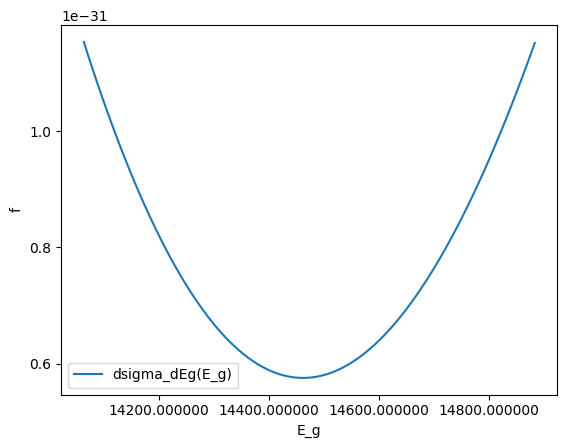

In [90]:
plt.figure(num=0, dpi=100)
gammaCM = 7500
betaCM = sqrt(1. - 1./gammaCM/gammaCM)
sz2 = np.cos(theta_LCS)

E_p = lorentz_transform(E_p, 61)
# E_g = lorentz_transform(E_g, 2)
xlist = np.linspace(E_p/(1.0 + 2.0*E_p/mc2), E_p, 100)
# xlist = np.linspace(E_p/(1.0 + 2.0*E_p/mc2), E_p, 100)
# xlist = np.linspace(lorentz_transform(E_p/(1.0 + 2.0*E_p/mc2), gammaCM), lorentz_transform(E_p, gammaCM), 100)

# xlist = np.linspace(E_p/(1.0 + 2.0*E_p/mc2), E_p, 100)

ylist = dsigma_dEg(xlist)
# ylist = dsigma_dEg_dphi(xlist, pi/6)
# plt.plot(xlist, ylist, label='dsigma_dEg_dphi(E_g)')
plt.plot(xlist, ylist, label='dsigma_dEg(E_g)')
plt.xlabel('E_g')
plt.ylabel('f')
plt.legend()
# plt.title('y=x^2')

from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
plt.locator_params(axis='both', nbins=6)
ax = plt.gca()

# x_formatter = ScalarFormatter(useOffset=False)
x_formatter = FormatStrFormatter('%.6f')
ax.xaxis.set_major_formatter(x_formatter)

In [91]:
# без отклонения/лобовое
e_1 = 2.0
gammaCM = 160


betaCM = sqrt(1. - 1./gammaCM/gammaCM)
e_2 = e_1 * gammaCM * (1. + betaCM)

print(e_2)
# energy = 2.0
# transformed = lorentz_transform(energy, 16)
# print(energy, transformed)

639.9937499389637


### Распределения по углу ϕ

In [92]:
# E_g = 0.002
# xlist = list(np.linspace(0, pi, 100))
# # np.ndarray()

# plt.figure(num=0, dpi=100)
# ylist = np.vectorize(dsigma_dEg_dphi)(E_g, xlist)
# plt.plot(xlist, ylist, label='dsigma_dEg_dphi(E_g)')

# plt.xlabel('ϕ')
# # plt.ylabel('f')
# plt.legend()
# # plt.title('y=x^2')

# from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
# plt.locator_params(axis='both', nbins=5)
# ax = plt.gca()

# # x_formatter = ScalarFormatter(useOffset=False)
# x_formatter = FormatStrFormatter('%.6f')
# ax.xaxis.set_major_formatter(x_formatter)

In [93]:
    # a = 1./(2.*E_p/mc2*E_p)
    # b = (1./E_p/mc2 - 1./E_g/mc2)*(1./E_p/mc2 - 1./E_g/mc2) + 2.*(1./E_p/mc2 - 1./E_g/mc2)
    # c = E_p/E_g + E_g/E_p
    # sigma_max = a*((1. - P_t)*b + c)
    # phi1 = random.uniform(0.0, 2*pi)
    # reject = True    
    # while reject:
    #     phi1 = random.uniform(0.0, 2*pi) 
    #     sigma1 = a*((1. + P_t*np.cos(2.*(tau-phi1)))*b + c)
    #     r = random.uniform(0.0, sigma_max)
    #     if r <= sigma1:
    #         reject = False

# xlist = []

# for _ in range(100):
#     reject = True
#     while (reject):
#         E_g = random.uniform(E_p/(1.0 + 2.0*E_p/mc2), E_p)
#         # Eg_mc2 = Eg/mc2

#         f_Eg = f(E_g)
                    
#         r = random.uniform(0, 1)
#         if r <= f_Eg:
#             reject = False
#         xlist.append(E_g)
# xlist.sort()

# ylist = f(xlist)
# plt.plot(xlist, ylist, label='f(E_g)')

# ylist = dsigma_dEg(xlist)
# plt.plot(xlist, ylist, label='dsigma_dEg(E_g)')

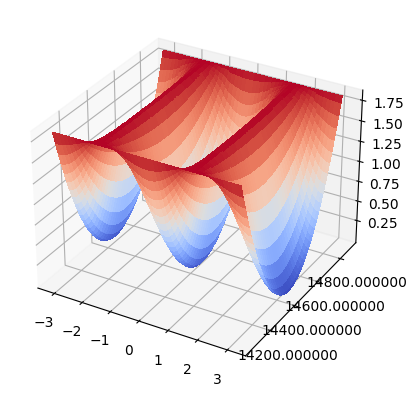

In [94]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.linspace(E_p/(1.0 + 2.0*E_p/mc2), E_p, 100)
Y = np.linspace(-pi, pi, 100)
X, Y = np.meshgrid(X, Y)

Z = dsigma_dEg_dphi(X, Y)

# Plot the surface.
surf = ax.plot_surface(Y, X, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.yaxis.set_major_formatter('{x:.06f}')

# Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()